## Assignment 1
## Oktaviani // PYTN-KS16-02

---


### Project Overview
The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

#### This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

## Import Library

In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from wordcloud import WordCloud

## Data Loading

In [2]:
df_can = pd.read_csv("dataset/london_crime_by_lsoa.csv")

In [3]:
# Menampilkan 5 data teratas
df_can.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# Menampilkan 5 data terbawah
df_can.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
# Melihat baris dan kolom dari data
df_can.shape

(13490604, 7)

In [6]:
# Membaca tiap kolom dan tipe datanya
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# Mengecek apakah ada missing value 
df_can.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# Mendeskripsikan isi data
df_can.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Visualisasi Data

### Line Chart
### Bagaimana tingkat kriminalitas nya berubah dari bulan ke bulan selama tahun 2012

---

In [9]:
df_2010 = df_can[df_can['year'] == 2010]

In [10]:
crime_by_month = df_2010.groupby('month')['value'].sum().reset_index()
crime_by_month

,month,value
0,1,54934
1,2,55069
2,3,63629
3,4,60085
4,5,62126
5,6,62632
6,7,63764
7,8,59040
8,9,59731
9,10,62113


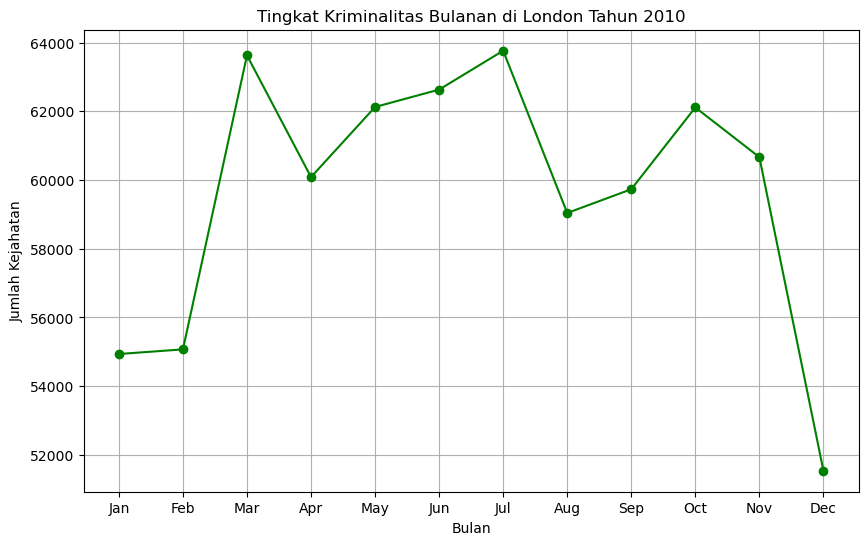

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(crime_by_month['month'], crime_by_month['value'], marker='o', linestyle='-',color='green')
plt.title('Tingkat Kriminalitas Bulanan di London Tahun 2010')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.show()

 ### Insight : 
 Pada tahun 2012, tingkat kriminalitas di London mencapai puncaknya pada bulan Juli dengan jumlah kejahatan mencapai 63,764, sementara pada bulan Desember, tingkat kriminalitas mencapai titik terendahnya dengan jumlah kejahatan sebanyak 51,536. Dengan demikian, bulan Juli menjadi periode dengan aktivitas kejahatan tertinggi, sementara bulan Desember menjadi periode dengan aktivitas kejahatan terendah pada tahun tersebut.

 ---


### Bar Chart
### Wilayah apa yang paling tinggi tingkat kriminalitasnya

---

In [14]:
crime_by_borough = df_can['borough'].value_counts()
crime_by_borough


Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

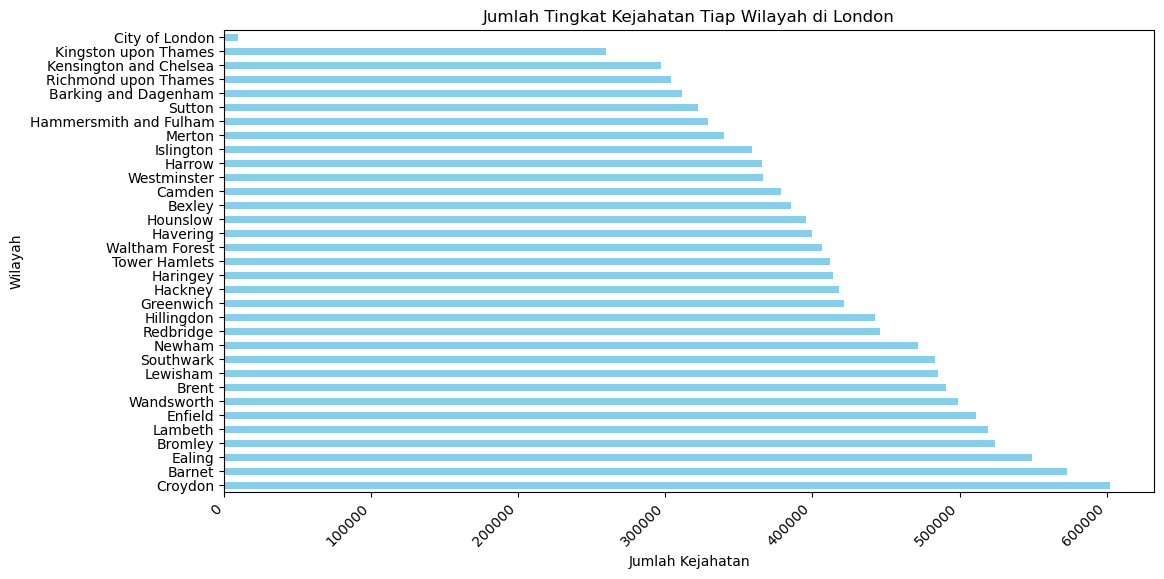

In [15]:
plt.figure(figsize=(12, 6))
crime_by_borough.plot(kind='barh', color='skyblue')
plt.title('Jumlah Tingkat Kejahatan Tiap Wilayah di London')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Wilayah')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Insight : 
- Wilayah Croydon memiliki tingkat kriminalitas tertinggi, dengan jumlah kejahatan mencapai 602,100.
- Wilayah Barnet menempati posisi kedua dengan tingkat kriminalitas 572,832.
- Wilayah Ealing berada di posisi ketiga dengan jumlah kejahatan sebanyak 549,396.

Sementara itu, wilayah City of London memiliki tingkat kriminalitas yang paling rendah, hanya sebanyak 9,720.

---

### Histogram
### Bagaimana frekuensi jumlah kriminalitas pada kategori major di London pada tahun 2008

---

In [16]:
df_2008 = df_can[df_can["year"] == 2008]
df_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)

#menunjukkan 5 data teratas

df_2008.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22128\234226722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
7930489,E01004734,Westminster,Theft and Handling,Other Theft,254,2008,2


In [17]:
#Total Kriminalitas pada ketegori major tahun 2008

df_major2008 = df_2008.groupby(['major_category']).sum()

df_major2008.drop(['year', 'month'], axis=1, inplace=True)


df_major2008 = df_major2008

#reset index

df_major2008.reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22128\2634790375.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major2008 = df_2008.groupby(['major_category']).sum()


,major_category,value
0,Burglary,88092
1,Criminal Damage,91872
2,Drugs,68804
3,Fraud or Forgery,5325
4,Other Notifiable Offences,10112
5,Robbery,29627
6,Sexual Offences,1273
7,Theft and Handling,283692
8,Violence Against the Person,159844


In [18]:
count, bin_edges = np.histogram(df_major2008)

print(count) # frequency count

print(bin_edges)# bin ranges

[3 1 1 2 0 1 0 0 0 1]
[  1273.   29514.9  57756.8  85998.7 114240.6 142482.5 170724.4 198966.3
 227208.2 255450.1 283692. ]


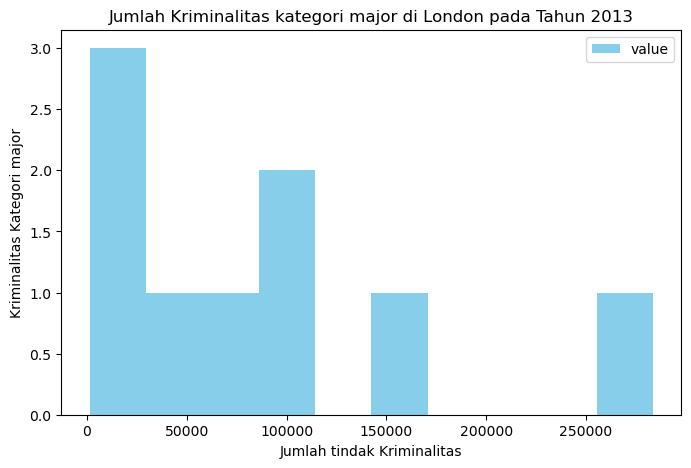

In [19]:
count, bin_edges = np. histogram(df_major2008)

df_major2008.plot(kind='hist', figsize=(8,5), color='skyblue') #inisialisasi plot histogram

plt.title("Jumlah Kriminalitas kategori major di London pada Tahun 2013")

plt.ylabel('Kriminalitas Kategori major')

plt.xlabel('Jumlah tindak Kriminalitas')

# menunjukkan plot

plt.show()

### Pie Chart
### Jenis Kejahatan di London dalam Kategori Major 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22128\1301931001.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  major_counts = df_can.groupby("major_category", axis=0).sum()


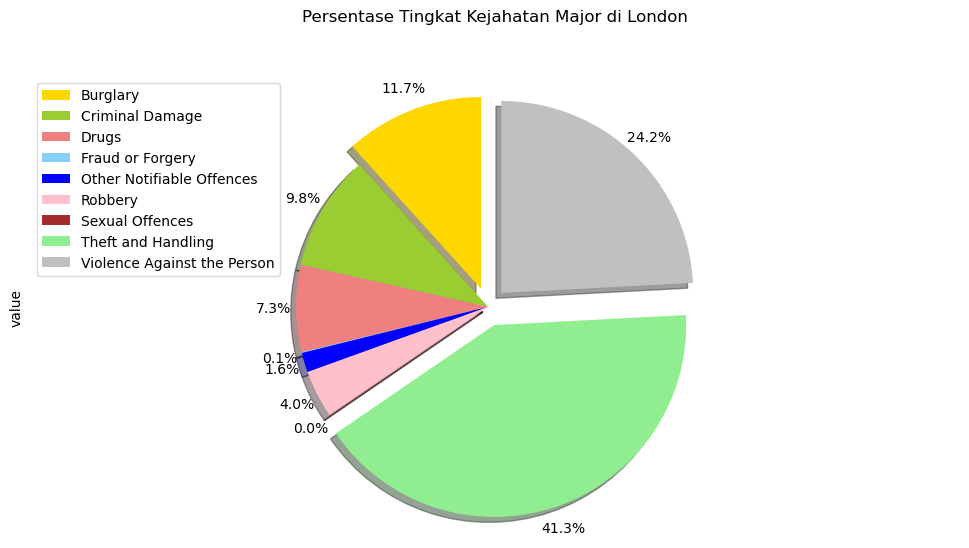

In [36]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue', 'pink', 'brown', 'lightgreen', 'silver']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

major_counts = df_can.groupby("major_category", axis=0).sum()
major_counts['value'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            colors=colors_list, 
                            explode=explode_list 
                            )

plt.title('Persentase Tingkat Kejahatan Major di London', y=1.1) 
plt.axis('equal') 
plt.legend(labels=major_counts.index, loc='upper left') 
plt.show()

### Insight :
- Jenis kejahatan yang paling dominan di London dalam kategori major adalah "theft and handling" dengan persentase sebesar 41.3%. Hal ini menunjukkan bahwa tindakan pencurian dan penanganan barang curian merupakan permasalahan utama dalam kategori kejahatan major di wilayah tersebut.

- "Violence against the person" menduduki peringkat kedua dengan persentase 24.2%. Informasi ini menunjukkan bahwa kekerasan terhadap individu menjadi perhatian signifikan dan menjadi salah satu prioritas penanganan kejahatan di London.

---

### Area Chart
###  Bagaimana distribusi jumlah kejahatan di 8 wilayah London dari tahun 2008 - 2016

In [47]:
filtered_data = df_can[(df_can['year'] >= 2008) & (df_can['year'] <= 2016)]

In [50]:
selected_boroughs = ['Westminster', 'Camden', 'Islington', 'Kensington and Chelsea', 'Hackney', 'Tower Hamlets', 'Lambeth', 'Southwark'] # Memilih 8 wilayah
filtered_data = filtered_data[filtered_data['borough'].isin(selected_boroughs)]


In [52]:
crime_by_area = filtered_data.groupby(['borough', 'year'])['value'].sum().unstack()
crime_by_area

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Hackney,22004,20718,20175,21395,27095,25633,24893,26941,28265
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092
Kensington and Chelsea,20663,18742,19481,19146,19757,17702,17840,19070,19580
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330


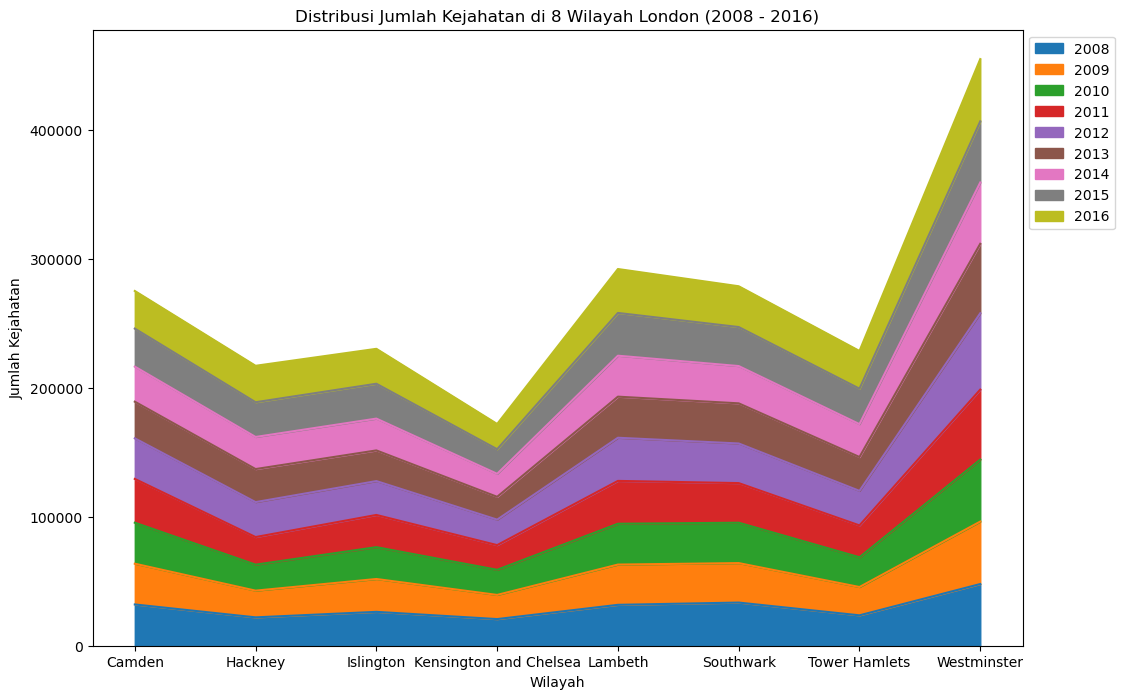

In [103]:
crime_by_area.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Distribusi Jumlah Kejahatan di 8 Wilayah London (2008 - 2016)')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kejahatan')
plt.legend( bbox_to_anchor=(1, 1))
plt.show()

### Insight : 
- Wilayah dengan tingkat kejahatan tertinggi selama periode 2008-2016 adalah Westminster, mencapai puncaknya pada tahun 2012 dengan jumlah kejahatan sebanyak 59,226. Informasi ini menunjukkan bahwa Westminster menjadi fokus perhatian pada tahun tersebut dalam hal keamanan dan penanganan kejahatan.

- Sebaliknya, wilayah dengan tingkat kejahatan terendah selama periode tersebut adalah Kensington and Chelsea, dengan angka terendah tercatat pada tahun 2013 sebanyak 17,702. Hal ini menunjukkan bahwa Kensington and Chelsea memiliki tingkat kejahatan yang lebih rendah dibandingkan wilayah lain selama tahun tersebut.

---

### Box Plot
### Bagaimana distribusi data jumlah kejahatan di wilayah Croydon pada tahun 2008 - 2016

In [129]:
# menunjukkan data di wilayah Westminster
df_borough_croydon = df_can[df_can["borough"] == 'Croydon']
df_borough_croydon.sort_values(['value'], ascending=False, axis=0, inplace=True)

df_borough_croydon.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22128\3866620390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borough_croydon.sort_values(['value'], ascending=False, axis=0, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
5551478,E01001014,Croydon,Theft and Handling,Theft From Shops,53,2015,11
581386,E01001043,Croydon,Theft and Handling,Other Theft,53,2009,8
7996428,E01001014,Croydon,Theft and Handling,Theft From Shops,51,2016,6
239276,E01001043,Croydon,Theft and Handling,Other Theft,49,2010,8
11969587,E01001014,Croydon,Theft and Handling,Theft From Shops,48,2011,5


In [130]:
dfcrime_croydon = df_borough_croydon[['year', 'value']].groupby(['year']).agg({'value': 'sum'}) #mengelompokan data year dan value berdasarkan year

dfcrime_croydon.reset_index() #riset index

,year,value
0,2008,29516
1,2009,29784
2,2010,29373
3,2011,29830
4,2012,30189
5,2013,27444
6,2014,27357
7,2015,28089
8,2016,28712


In [131]:
dfcrime_croydon.describe()

,value
count,9.000000
mean,28921.555556
std,1066.579241
min,27357.000000
25%,28089.000000
50%,29373.000000
75%,29784.000000
max,30189.000000


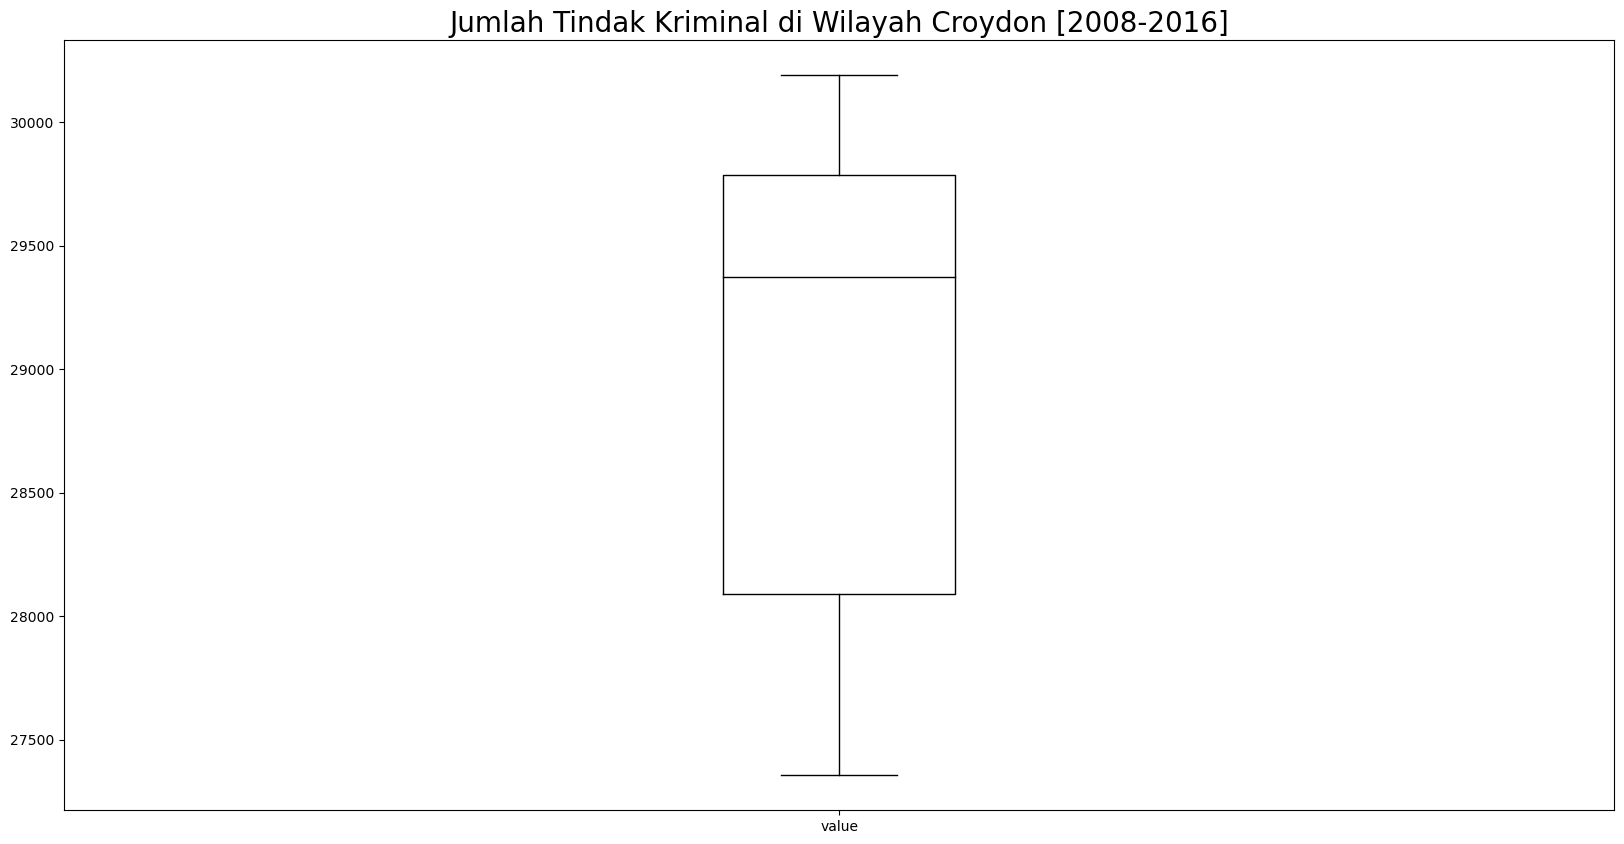

In [133]:
dfcrime_croydon.plot(kind="box",
                figsize=(20,10),
                color = "black")

plt.title("Jumlah Tindak Kriminal di Wilayah Croydon [2008-2016]", fontsize=20)

plt.show()

### Insight : 
Jumlah tingkat kejahatan di wilayah Croydon selama periode tahun 2008-2016 berkisar antara 27357 hingga 30189, dengan rata-rata sekitar 28921 kejadian.

### Word Cloud
### Jenis kejahatan yang sering muncul di london

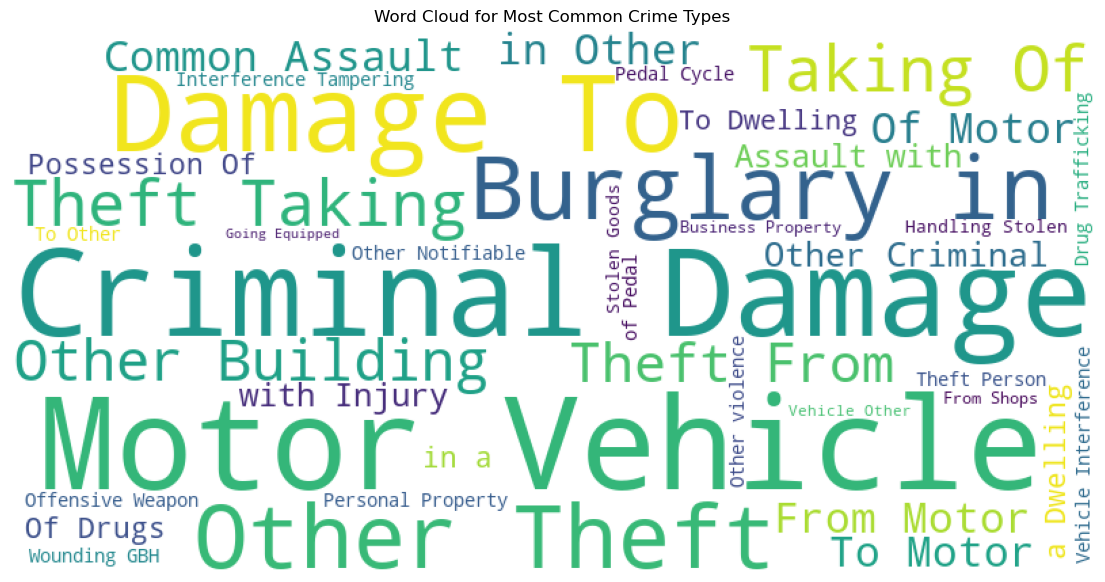

In [71]:
all_crimes_text = " ".join(df_can["minor_category"])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      stopwords=set(['stopword1', 'stopword2']), 
                      min_font_size=10).generate(all_crimes_text)

plt.figure(figsize=(14, 18))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('Word Cloud for Most Common Crime Types')
plt.show()

### Insight :
Jenis kejahatan yang paling sering terjadi di London pada tahun 2008-2016 didominasi oleh kata-kata seperti "theft taking," "criminal damage," "motor vehicle," dan "burglary." Hal ini menunjukkan bahwa tindakan pencurian, kerusakan properti, pencurian kendaraan, dan perampokan merupakan jenis kejahatan yang cenderung tinggi selama periode tersebut. 

---

### Folium

In [64]:
maps = folium.Map(location=[51.509865, -0.118092], zoom_start=10)
maps